In [1]:
import pandas as pd
sales = pd.read_csv("./input/sales3.csv")
import seaborn as sns

In [2]:
sales.head(1000)

,flag,gender,education,house_val,age,online,customer_psy,marriage,child,occupation,mortgage,house_owner,region,car_prob,fam_income
0,Y,M,4. Grad,756460,1_Unk,N,B,NaN,U,Professional,1Low,NaN,Midwest,1,L
1,N,F,3. Bach,213171,7_>65,N,E,NaN,U,Professional,1Low,Owner,Northeast,3,G
2,N,M,2. Some College,111147,2_<=25,Y,C,NaN,Y,Professional,1Low,Owner,Midwest,1,J
3,Y,M,2. Some College,354151,2_<=25,Y,B,Single,U,Sales/Service,1Low,NaN,West,2,L
4,Y,F,2. Some College,117087,1_Unk,Y,J,Married,Y,Sales/Service,1Low,NaN,South,7,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Y,M,2. Some College,683419,4_<=45,Y,E,Married,U,Professional,3High,Owner,West,1,F
996,N,M,2. Some College,27239,5_<=55,N,G,Married,U,Sales/Service,1Low,Owner,Midwest,9,F
997,N,F,0. <HS,0,1_Unk,N,G,NaN,Y,Retired,1Low,Renter,South,8,C
998,Y,M,1. HS,526862,5_<=55,Y,C,Married,Y,Sales/Service,3High,Owner,Northeast,2,C


In [3]:
from sklearn.tree import DecisionTreeClassifier
sales = sales.dropna()

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
sales_train, sales_test = train_test_split(sales, test_size=0.3, stratify=sales['flag'], random_state=42)
print(sales_train.shape, sales_test.shape)

(16490, 15) (7068, 15)


In [6]:
features= ['house_val']
dt_classification = DecisionTreeClassifier(max_depth = 5) # Increase max_depth to see effect in the plot
dt_classification.fit(sales_train[features], sales_train['flag'])

DecisionTreeClassifier(max_depth=5)

In [7]:
from sklearn import tree
import graphviz
def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

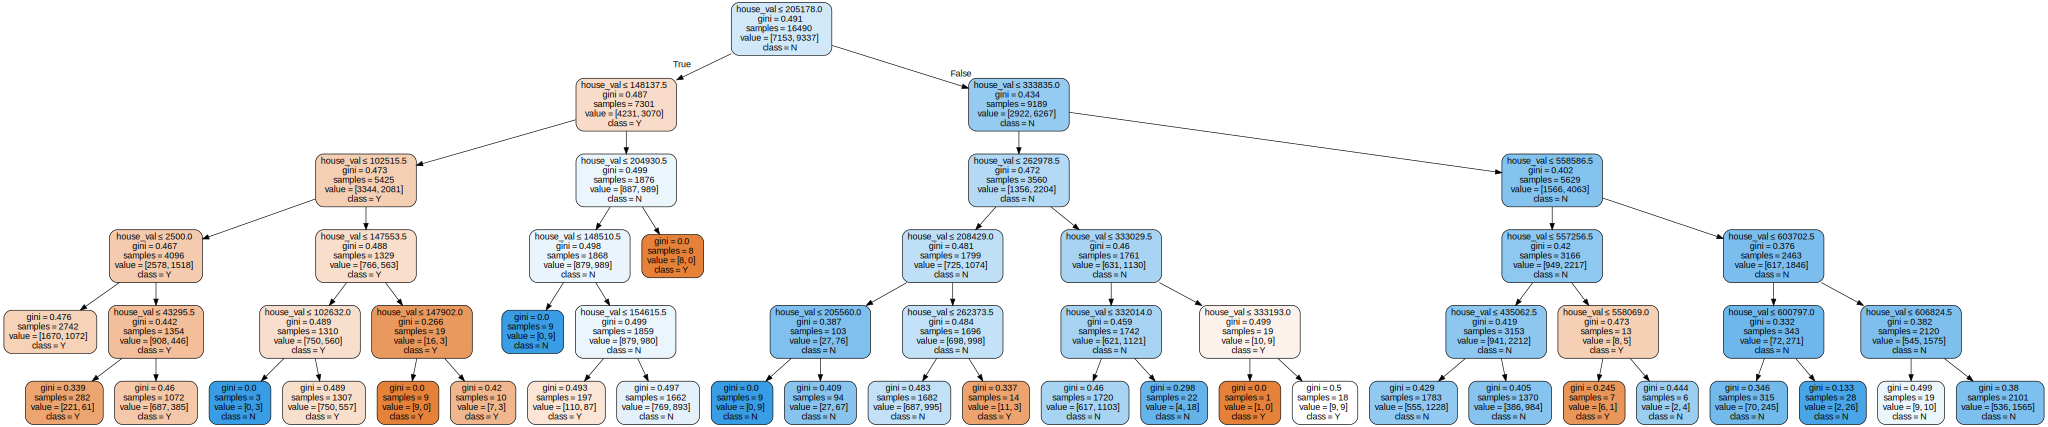

In [8]:
plot_tree_classification(dt_classification, features, sales.flag.unique())

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [11]:
predictionsOnTrainset = dt_classification.predict(sales_train[features])
predictionsOnTestset = dt_classification.predict(sales_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, sales_train.flag)
accuracyTest = calculate_accuracy(predictionsOnTestset, sales_test.flag)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.6457246816252274
Accuracy on test set 0.6372382569326542


De accuratie is verschillend ik had verwacht dat de accuratie iets hoger zou liggen. De ideale diepte die ik heb gevonden is 5 op het moment dat je hierna hoger gaat gaat de training set omhoog terwijl de test set daalt.

De tree werkt als volgt in de eerste stap kijkt hij of het bedrag van het huis groter of gelijk is aan 20587 als dit waar is zet hij hem naar links als dit niet zo is zet hij hem naar rechts. Dit blijft hij eigenlijk netzo lang doen tot hij niet meer verder kan of de gezette diepte heeft bereikt. De gini die je ziet staan is de mate van ongelijkheid en je ziet dat deze verder afneemt naar mate je dieper de boom in gaat.